In [11]:
from __future__ import print_function

import numpy as np
import keras
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


%matplotlib inline

In [14]:
classList = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
batch_size = 100
num_classes = 10
epochs = 100

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-8)

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 78s - loss: 3.5202 - acc: 0.1364 - val_loss: 2.1411 - val_acc: 0.2047
Epoch 2/100
50000/50000 [==============================] - 81s - loss: 2.1587 - acc: 0.1773 - val_loss: 1.9684 - val_acc: 0.2729
Epoch 3/100
50000/50000 [==============================] - 81s - loss: 2.0324 - acc: 0.2359 - val_loss: 1.7914 - val_acc: 0.3445
Epoch 4/100
50000/50000 [==============================] - 82s - loss: 1.9179 - acc: 0.2818 - val_loss: 1.6888 - val_acc: 0.3965
Epoch 5/100
50000/50000 [==============================] - 82s - loss: 1.8214 - acc: 0.3264 - val_loss: 1.5822 - val_acc: 0.4360
Epoch 6/100
50000/50000 [==============================] - 82s - loss: 1.7323 - acc: 0.3637 - val_loss: 1.4927 - val_acc: 0.4623
Epoch 7/100
50000/50000 [==============================] - 81s - loss: 1.6640 - acc: 0.3905 - val_loss: 1.4386 - val_acc: 0.4917
Epoch 8/100
50000/

In [8]:
model.save('models/cifar10-cc-673.h5')

In [9]:
del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('models/cifar10-cc-673.h5')

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)

 9920/10000 [============================>.] - ETA: 0s[1.2958218957901, 0.67290000000000005]


In [22]:
img_path = 'input/cat01.jpg'

img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#print('Predicted:', decode_predictions(preds, top=1)[0])

[[  6.97877200e-04   4.27309606e-05   3.86324003e-02   3.17058116e-01
    1.21492706e-02   7.43695945e-02   5.53115845e-01   2.81954557e-03
    9.54523784e-06   1.10504741e-03]]
frog


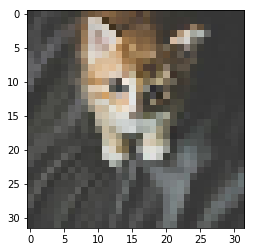

In [23]:
plt.imshow(img)
print(preds)
print(classList[preds.argmax()])